# IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre:** 2025-2<br>
**Profesor:** Rodrigo A. Carrasco <br>

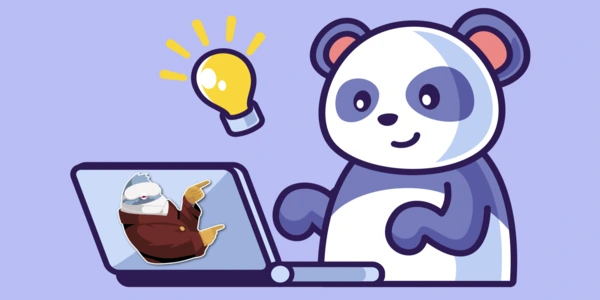

# Simulacro I2 (Basado en I2-2024-2)

## Imports

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Datos

Para esta parte de la Interrogación estaremos usando dos bases de datos públicas del Gobierno de Chile.

Primero, usaremos una base de datos con la información de atenciones de urgencia en la Región del Maule para todo el 2023 (`AtencionesUrgenciaMaule2023.csv`).

Como segunda base, usaremos con una base de datos de información ambiental proveniente del Sistema de Información Nacional de Calidad del Aire (SINCA) que pueden encontrar acá https://sinca.mma.gob.cl/ (`datos_230101_231231.csv`), que tiene la calidad del aire para la ciudad de Cauquenes, en la Región del Maule, durante todo el 2023.

**Tips**

> - Revisar datasets con antelación (Entender para que sirve cada columna y pensar en opciones de preguntas)
> - Hacer un grupo y compartirse lo que hicieron
> - Probar hacer lo que haremos hoy en los datasets
> - Pensar que los tienen que unir mediante merge 

## 1. Limpieza y transformación

Realice las siguientes actividades para terminar con un DataFrames que estén limpios y listos para poder hacer las actividades posteriores.

### (*2 pt*) 1.1 Preparación DataFrame de Urgencias

Cargue los datos del archivo `AtencionesUrgenciaMaule2023.csv` en un DataFrame de pandas llamado `urgencias`. Revise el separador usado en el archivo para leerlo correctamente. Si obtiene un mensaje de error al leer el archivo (dependiendo de su sistema operativo y la configuración) puede usar el parámetro `encoding = "latin"` como parámetro en la lectura del archivo.

In [2]:
urgencias = pd.read_csv('data\\AtencionesUrgenciaMaule2023.csv', sep = ',', encoding = "latin")
urgencias.head(5)

,IdEstablecimiento,NEstablecimiento,IdCausa,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,...,semana,GLOSATIPOESTABLECIMIENTO,GLOSATIPOATENCION,GlosaTipoCampana,CodigoRegion,NombreRegion,CodigoDependencia,NombreDependencia,CodigoComuna,NombreComuna
0,16-107,Hospital de ConstituciÃ³n,40,"Trastornos neurÃ³ticos, trastornos relacionado...",0,0,0,0,0,0,...,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7102,ConstituciÃ³n
1,16-954,SUR Mercedes,18,TOTAL TRAUMATISMOS Y ENVENENAMIENTO,0,0,0,0,0,0,...,27,SUR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7101,Talca
2,16-831,SAPU Carlos Trupp,35,Lesiones autoinfligidas intencionalmente (X60-...,0,0,0,0,0,0,...,27,SAPU,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7101,Talca
3,16-813,SAR Luis Tobar Rojas,40,"Trastornos neurÃ³ticos, trastornos relacionado...",3,0,0,0,3,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7109,San Clemente
4,16-954,SUR Mercedes,35,Lesiones autoinfligidas intencionalmente (X60-...,0,0,0,0,0,0,...,27,SUR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7101,Talca


In [3]:
urgencias[["fecha"]].head(5)

,fecha
0,03/07/2023
1,04/07/2023
2,04/07/2023
3,03/07/2023
4,04/07/2023


In [4]:
urgencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859840 entries, 0 to 859839
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   IdEstablecimiento         859840 non-null  object
 1   NEstablecimiento          859840 non-null  object
 2   IdCausa                   859840 non-null  int64 
 3   GlosaCausa                859840 non-null  object
 4   Total                     859840 non-null  int64 
 5   Menores_1                 859840 non-null  int64 
 6   De_1_a_4                  859840 non-null  int64 
 7   De_5_a_14                 859840 non-null  int64 
 8   De_15_a_64                859840 non-null  int64 
 9   De_65_y_mas               859840 non-null  int64 
 10  fecha                     859840 non-null  object
 11  semana                    859840 non-null  int64 
 12  GLOSATIPOESTABLECIMIENTO  859840 non-null  object
 13  GLOSATIPOATENCION         859840 non-null  object
 14  Glos

### (*2 pt*) 1.2 Filtrado

Estamos interesados en conectar ambas bases de datos, por lo que debemos filtrar la base de Urgencias para dejar sólo la información de la ciudad de Cauquenes. Filtre el DataFrame anterior para dejar sólo las filas que tienen `Cauquenes` como `NombreComuna`. Mantengan el mismo nombre `urgencias` al DataFrame.

In [5]:
urgencias = urgencias[urgencias['NombreComuna']=='Cauquenes']
urgencias.head(5)

,IdEstablecimiento,NEstablecimiento,IdCausa,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,...,semana,GLOSATIPOESTABLECIMIENTO,GLOSATIPOATENCION,GlosaTipoCampana,CodigoRegion,NombreRegion,CodigoDependencia,NombreDependencia,CodigoComuna,NombreComuna
25,16-829,SAR Dr. Juan Saavedra Macaya,20,Otras causas externas,6,1,0,0,5,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
26,16-111,Hospital San Juan de Dios (Cauquenes),20,Otras causas externas,9,0,0,0,7,2,...,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
44,16-829,SAR Dr. Juan Saavedra Macaya,33,"- COVID-19, VIRUS NO IDENTIFICADO U07.2",0,0,0,0,0,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
45,16-111,Hospital San Juan de Dios (Cauquenes),33,"- COVID-19, VIRUS NO IDENTIFICADO U07.2",0,0,0,0,0,0,...,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
66,16-829,SAR Dr. Juan Saavedra Macaya,42,- CAUSAS POR TRASTORNOS MENTALES (F00-F99),0,0,0,0,0,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes


### (*6 pts*) 1.3 Limpieza básica de `urgencias`

En la siguientes celdas (puede agregar celdas si lo necesita) revise el DataFrame `urgencias` y realice las siguientes transformaciones:

- Elimine todas las muestras que tengan algún dato nulo entre sus columnas.
- Identifique y luego eliminar los datos que estés duplicados.
- Verifique que los tipos de datos sean adecuados para cada columna y corrija si no están correctos. Asegure que la columna `fecha` este en el formato adecuado.
- Corrija los tipos de las columnas según corresponda, siempre justificando sus decisiones.

In [6]:
# revisamos los datos para ver qué columnas tienen muchos datos nulos o vacíos
urgencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29200 entries, 25 to 859807
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   IdEstablecimiento         29200 non-null  object
 1   NEstablecimiento          29200 non-null  object
 2   IdCausa                   29200 non-null  int64 
 3   GlosaCausa                29200 non-null  object
 4   Total                     29200 non-null  int64 
 5   Menores_1                 29200 non-null  int64 
 6   De_1_a_4                  29200 non-null  int64 
 7   De_5_a_14                 29200 non-null  int64 
 8   De_15_a_64                29200 non-null  int64 
 9   De_65_y_mas               29200 non-null  int64 
 10  fecha                     29200 non-null  object
 11  semana                    29200 non-null  int64 
 12  GLOSATIPOESTABLECIMIENTO  29200 non-null  object
 13  GLOSATIPOATENCION         29200 non-null  object
 14  GlosaTipoCampana         

**Tips Transformación**
> + Revisar Fechas
> + Revisar valores que deberían ser numéricos o categóricos
> + Revisar si hay que normalizar alguna columna

**Tips Limpieza**
> + Revisar Nulos (A veces comnbiene eliminar y a veces combniene rellenar)
> + Revisar Duplicados
> + Reviar Columnas con alto porcentaje de nulos
> + Revisar Columnas inncesesarias (Mismo valor en todas las filas por ejemplo)

In [7]:
# Filas con nulos
urgencias[urgencias.isna().any(axis=1)]

,IdEstablecimiento,NEstablecimiento,IdCausa,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,...,semana,GLOSATIPOESTABLECIMIENTO,GLOSATIPOATENCION,GlosaTipoCampana,CodigoRegion,NombreRegion,CodigoDependencia,NombreDependencia,CodigoComuna,NombreComuna


In [8]:
urgencias = urgencias.dropna(axis=0, how='any')
urgencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29200 entries, 25 to 859807
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   IdEstablecimiento         29200 non-null  object
 1   NEstablecimiento          29200 non-null  object
 2   IdCausa                   29200 non-null  int64 
 3   GlosaCausa                29200 non-null  object
 4   Total                     29200 non-null  int64 
 5   Menores_1                 29200 non-null  int64 
 6   De_1_a_4                  29200 non-null  int64 
 7   De_5_a_14                 29200 non-null  int64 
 8   De_15_a_64                29200 non-null  int64 
 9   De_65_y_mas               29200 non-null  int64 
 10  fecha                     29200 non-null  object
 11  semana                    29200 non-null  int64 
 12  GLOSATIPOESTABLECIMIENTO  29200 non-null  object
 13  GLOSATIPOATENCION         29200 non-null  object
 14  GlosaTipoCampana         

In [9]:
urgencias['fecha']

25        04/07/2023
26        04/07/2023
44        04/07/2023
45        04/07/2023
66        04/07/2023
             ...    
859743    19/02/2023
859760    19/02/2023
859790    06/01/2023
859792    06/01/2023
859807    17/03/2023
Name: fecha, Length: 29200, dtype: object

In [10]:
display(urgencias[urgencias.duplicated()])

## Eliminar duplicados si es que hay

urgencias = urgencias.drop_duplicates()

,IdEstablecimiento,NEstablecimiento,IdCausa,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,...,semana,GLOSATIPOESTABLECIMIENTO,GLOSATIPOATENCION,GlosaTipoCampana,CodigoRegion,NombreRegion,CodigoDependencia,NombreDependencia,CodigoComuna,NombreComuna


In [11]:
urgencias['fecha'] = pd.to_datetime(urgencias['fecha'], format='%d/%m/%Y')
urgencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29200 entries, 25 to 859807
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IdEstablecimiento         29200 non-null  object        
 1   NEstablecimiento          29200 non-null  object        
 2   IdCausa                   29200 non-null  int64         
 3   GlosaCausa                29200 non-null  object        
 4   Total                     29200 non-null  int64         
 5   Menores_1                 29200 non-null  int64         
 6   De_1_a_4                  29200 non-null  int64         
 7   De_5_a_14                 29200 non-null  int64         
 8   De_15_a_64                29200 non-null  int64         
 9   De_65_y_mas               29200 non-null  int64         
 10  fecha                     29200 non-null  datetime64[ns]
 11  semana                    29200 non-null  int64         
 12  GLOSATIPOESTABLECIMIE

In [12]:
urgencias.head()

,IdEstablecimiento,NEstablecimiento,IdCausa,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,...,semana,GLOSATIPOESTABLECIMIENTO,GLOSATIPOATENCION,GlosaTipoCampana,CodigoRegion,NombreRegion,CodigoDependencia,NombreDependencia,CodigoComuna,NombreComuna
25,16-829,SAR Dr. Juan Saavedra Macaya,20,Otras causas externas,6,1,0,0,5,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
26,16-111,Hospital San Juan de Dios (Cauquenes),20,Otras causas externas,9,0,0,0,7,2,...,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
44,16-829,SAR Dr. Juan Saavedra Macaya,33,"- COVID-19, VIRUS NO IDENTIFICADO U07.2",0,0,0,0,0,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
45,16-111,Hospital San Juan de Dios (Cauquenes),33,"- COVID-19, VIRUS NO IDENTIFICADO U07.2",0,0,0,0,0,0,...,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes
66,16-829,SAR Dr. Juan Saavedra Macaya,42,- CAUSAS POR TRASTORNOS MENTALES (F00-F99),0,0,0,0,0,0,...,27,SAR,Indiferenciado,Ninguna,7,Del Maule,16,Del Maule,7201,Cauquenes


In [13]:
## Separamos IDEstablecimiento en Nro e ID

urgencias[['Nro', 'ID']] = urgencias['IdEstablecimiento'].str.split('-', expand=True)
urgencias["Nro"] = urgencias["Nro"].astype(int)
urgencias["ID"] = urgencias["ID"].astype(int)

In [14]:
urgencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29200 entries, 25 to 859807
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   IdEstablecimiento         29200 non-null  object        
 1   NEstablecimiento          29200 non-null  object        
 2   IdCausa                   29200 non-null  int64         
 3   GlosaCausa                29200 non-null  object        
 4   Total                     29200 non-null  int64         
 5   Menores_1                 29200 non-null  int64         
 6   De_1_a_4                  29200 non-null  int64         
 7   De_5_a_14                 29200 non-null  int64         
 8   De_15_a_64                29200 non-null  int64         
 9   De_65_y_mas               29200 non-null  int64         
 10  fecha                     29200 non-null  datetime64[ns]
 11  semana                    29200 non-null  int64         
 12  GLOSATIPOESTABLECIMIE

In [15]:
print(urgencias["Nro"].value_counts())
print()
print(urgencias["CodigoDependencia"].value_counts())

Nro
16    29200
Name: count, dtype: int64

CodigoDependencia
16    29200
Name: count, dtype: int64


In [16]:
# Eliminamos columna Nro ya que no aporta información relevante lo mismo con CodigoDependencia
# Aprovechamos de paso de eliminar la columna IdEstablecimiento original
urgencias = urgencias.drop(columns=['Nro', 'IdEstablecimiento', 'CodigoDependencia'])

In [17]:
urgencias.head()

,NEstablecimiento,IdCausa,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,fecha,semana,GLOSATIPOESTABLECIMIENTO,GLOSATIPOATENCION,GlosaTipoCampana,CodigoRegion,NombreRegion,NombreDependencia,CodigoComuna,NombreComuna,ID
25,SAR Dr. Juan Saavedra Macaya,20,Otras causas externas,6,1,0,0,5,0,2023-07-04,27,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829
26,Hospital San Juan de Dios (Cauquenes),20,Otras causas externas,9,0,0,0,7,2,2023-07-04,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,111
44,SAR Dr. Juan Saavedra Macaya,33,"- COVID-19, VIRUS NO IDENTIFICADO U07.2",0,0,0,0,0,0,2023-07-04,27,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829
45,Hospital San Juan de Dios (Cauquenes),33,"- COVID-19, VIRUS NO IDENTIFICADO U07.2",0,0,0,0,0,0,2023-07-04,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,111
66,SAR Dr. Juan Saavedra Macaya,42,- CAUSAS POR TRASTORNOS MENTALES (F00-F99),0,0,0,0,0,0,2023-07-04,27,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829


### (*2 pt*) 1.4 Preparación DataFrame `SINCA`

Cargue los datos del archivo `datos_230101_231231.csv` en un DataFrame de pandas llamado `sinca`. Igual que en el caso anterior, revise el separador usado por el archivo para leerlo correctamente. 

In [18]:
sinca = pd.read_csv('data\\datos_230101_231231.csv', sep = ';', encoding = "latin")
sinca.head(10)

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,Unnamed: 5
0,230101,0,7.0,NaN,NaN,NaN
1,230102,0,5.0,NaN,NaN,NaN
2,230103,0,6.0,NaN,NaN,NaN
3,230104,0,5.0,NaN,NaN,NaN
4,230105,0,4.0,NaN,NaN,NaN
5,230106,0,6.0,NaN,NaN,NaN
6,230107,0,7.0,NaN,NaN,NaN
7,230108,0,5.0,NaN,NaN,NaN
8,230109,0,8.0,NaN,NaN,NaN
9,230110,0,5.0,NaN,NaN,NaN


### (*5 pts*) 1.5 Limpieza básica de `SINCA`

Al igual que con el DataFrame `urgencias`, revise este nuevo DataFrame y realice las siguientes transformaciones:

- Elimine todas las columnas que considere innecesarias. Justifique su elección.
- Si hay muestras que tengan algún dato nulo, impute ese valor usando el promedio de los datos cercanos.
- Identifique y luego elimine los datos que estés duplicados.
- Verifique que los tipos de datos sean adecuados para cada columna y corrija si no están correctos. Si hay fechas, deben quedar en formato `datetime64`
- Cambie el nombre de la columna `FECHA (YYMMDD)` por `fecha` para que ambas bases queden con el mismo nombre en la columna de fecha.

In [19]:
# revisamos los datos para ver qué columnas tienen datos nulos o vacíos
sinca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FECHA (YYMMDD)          364 non-null    int64  
 1   HORA (HHMM)             364 non-null    int64  
 2   Registros validados     355 non-null    float64
 3   Registros preliminares  0 non-null      float64
 4   Registros no validados  5 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(4), int64(2)
memory usage: 17.2 KB


In [20]:
sinca.head(10)

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,Unnamed: 5
0,230101,0,7.0,NaN,NaN,NaN
1,230102,0,5.0,NaN,NaN,NaN
2,230103,0,6.0,NaN,NaN,NaN
3,230104,0,5.0,NaN,NaN,NaN
4,230105,0,4.0,NaN,NaN,NaN
5,230106,0,6.0,NaN,NaN,NaN
6,230107,0,7.0,NaN,NaN,NaN
7,230108,0,5.0,NaN,NaN,NaN
8,230109,0,8.0,NaN,NaN,NaN
9,230110,0,5.0,NaN,NaN,NaN


**Tips Transformación**
> + Revisar Fechas
> + Revisar valores que deberían ser numéricos o categóricos
> + Revisar si hay que normalizar alguna columna

**Tips Limpieza**
> + Revisar Nulos (A veces comnbiene eliminar y a veces combniene rellenar)
> + Revisar Duplicados
> + Reviar Columnas con alto porcentaje de nulos
> + Revisar Columnas inncesesarias (Mismo valor en todas las filas por ejemplo)

In [21]:
sinca = sinca.drop(["Registros preliminares", "Registros no validados", "Unnamed: 5"], axis=1)

sinca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA (YYMMDD)       364 non-null    int64  
 1   HORA (HHMM)          364 non-null    int64  
 2   Registros validados  355 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.7 KB


```python
## Tambien servia

sinca = sinca.dropna(axis=1, thresh=200) 
# Eliminamos columnas con más de 200 datos nulos

```

In [22]:
## Eliminar filas con datos nulos

print(f"Hay {sinca[sinca.isna().any(axis=1)].shape[0]} filas con valores nulos")

# sinca = sinca.dropna(axis=0, how='any')
# sinca.info()

## Remplazar nulos por promedio

sinca = sinca.fillna(sinca.mean())
sinca.info()


Hay 9 filas con valores nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA (YYMMDD)       364 non-null    int64  
 1   HORA (HHMM)          364 non-null    int64  
 2   Registros validados  364 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.7 KB


In [23]:
display(sinca[sinca.duplicated()])

## Eliminar duplicados si es que hay

sinca = sinca.drop_duplicates()

,FECHA (YYMMDD),HORA (HHMM),Registros validados


In [24]:
sinca['fecha'] = pd.to_datetime(sinca['FECHA (YYMMDD)'], format='%y%m%d') 
sinca.head(10)

,FECHA (YYMMDD),HORA (HHMM),Registros validados,fecha
0,230101,0,7.0,2023-01-01
1,230102,0,5.0,2023-01-02
2,230103,0,6.0,2023-01-03
3,230104,0,5.0,2023-01-04
4,230105,0,4.0,2023-01-05
5,230106,0,6.0,2023-01-06
6,230107,0,7.0,2023-01-07
7,230108,0,5.0,2023-01-08
8,230109,0,8.0,2023-01-09
9,230110,0,5.0,2023-01-10


```python

## Tambien se podia

sinca['FECHA (YYMMDD)'] = pd.to_datetime(sinca['FECHA (YYMMDD)'], format='%y%m%d')

## Renombramos columna fecha

sinca = sinca.rename(columns={'FECHA (YYMMDD)': 'fecha'})

```

In [25]:
sinca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FECHA (YYMMDD)       364 non-null    int64         
 1   HORA (HHMM)          364 non-null    int64         
 2   Registros validados  364 non-null    float64       
 3   fecha                364 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 11.5 KB


In [26]:
sinca.describe()

,FECHA (YYMMDD),HORA (HHMM),Registros validados,fecha
count,364.000000,364.0,364.000000,364
mean,230666.777473,0.0,16.980282,2023-07-01 12:00:00
min,230101.000000,0.0,1.000000,2023-01-01 00:00:00
25%,230401.750000,0.0,6.000000,2023-04-01 18:00:00
50%,230701.500000,0.0,11.000000,2023-07-01 12:00:00
75%,230947.750000,0.0,23.000000,2023-09-30 06:00:00
max,231230.000000,0.0,159.000000,2023-12-30 00:00:00
std,344.684648,0.0,18.124520,NaN


#### Ejemplo de Apply 

Supongamos que tenemos una columna llamada valor que esta en el formato "y_1|y_2|y_3" y queremos separar esos valores o extraer solo el primero


In [27]:
## Creamos la columna de ejemplo de forma random
n = 10
valores = [f"{rnd.randint(1,100)}|{rnd.randint(1,100)}|{rnd.randint(1,100)}" for _ in range(n)]
df_ejemplo = pd.DataFrame({'valor': valores})
df_ejemplo

,valor
0,56|60|7
1,95|24|59
2,31|3|26
3,59|50|37
4,68|11|49
5,41|12|31
6,24|46|41
7,7|56|17
8,78|35|75
9,69|37|24


In [28]:
df_ejemplo['valor_lista'] = df_ejemplo['valor'].apply(lambda x: x.split("|"))
df_ejemplo

,valor,valor_lista
0,56|60|7,"[56, 60, 7]"
1,95|24|59,"[95, 24, 59]"
2,31|3|26,"[31, 3, 26]"
3,59|50|37,"[59, 50, 37]"
4,68|11|49,"[68, 11, 49]"
5,41|12|31,"[41, 12, 31]"
6,24|46|41,"[24, 46, 41]"
7,7|56|17,"[7, 56, 17]"
8,78|35|75,"[78, 35, 75]"
9,69|37|24,"[69, 37, 24]"


In [29]:
df_ejemplo['valor_nuevo'] = df_ejemplo['valor'].apply(lambda x: int(x.split("|")[0]))
df_ejemplo

,valor,valor_lista,valor_nuevo
0,56|60|7,"[56, 60, 7]",56
1,95|24|59,"[95, 24, 59]",95
2,31|3|26,"[31, 3, 26]",31
3,59|50|37,"[59, 50, 37]",59
4,68|11|49,"[68, 11, 49]",68
5,41|12|31,"[41, 12, 31]",41
6,24|46|41,"[24, 46, 41]",24
7,7|56|17,"[7, 56, 17]",7
8,78|35|75,"[78, 35, 75]",78
9,69|37|24,"[69, 37, 24]",69


In [30]:
df_ejemplo["suma"] = df_ejemplo['valor_lista'].apply(lambda x: sum([int(i) for i in x]))
df_ejemplo

,valor,valor_lista,valor_nuevo,suma
0,56|60|7,"[56, 60, 7]",56,123
1,95|24|59,"[95, 24, 59]",95,178
2,31|3|26,"[31, 3, 26]",31,60
3,59|50|37,"[59, 50, 37]",59,146
4,68|11|49,"[68, 11, 49]",68,128
5,41|12|31,"[41, 12, 31]",41,84
6,24|46|41,"[24, 46, 41]",24,111
7,7|56|17,"[7, 56, 17]",7,80
8,78|35|75,"[78, 35, 75]",78,188
9,69|37|24,"[69, 37, 24]",69,130


In [31]:
df_ejemplo.describe()

,valor_nuevo,suma
count,10.000000,10.000000
mean,52.800000,122.800000
std,26.873366,41.278997
min,7.000000,60.000000
25%,33.500000,90.750000
50%,57.500000,125.500000
75%,68.750000,142.000000
max,95.000000,188.000000


## 2. EDA

En esta pregunta exploraremos los dos DataFrames de la Pregunta 1. 

Comenzaremos por el DataFrame de `urgencias` que tiene, para cada establecimiento, día y causa, la cantidad de pacientes que vistó el establecimiento en la columna `Total`. Además, las columnas `[Menores_1, De_1_a_4, De_5_a_14, De_15_a_64, De_65_y_mas]` tiene la distribución por del `Total` de visitas por cada grupo de edad.

### (*2 pts*) 2.1 Filtrando datos

El dataframe `urgencias` tiene una columna llamada `GlosaCausa` que identifica la causa de cada visita. Genere un listado de los valores únicos que tiene esa columna para que podamos identificar los nombres de las patologías por las que han ido los pacientes a cada lugar.

In [32]:
causas = urgencias['GlosaCausa'].unique()
causas

array(['Otras causas externas',
       ' - COVID-19, VIRUS NO IDENTIFICADO U07.2',
       ' - CAUSAS POR TRASTORNOS MENTALES (F00-F99)',
       'CIRUGÃ\x8dAS DE URGENCIA',
       'Trastornos mentales y del comportamiento debidos al uso de sustancias psicoactivas (F10-F19)',
       'Otros trastornos mentales no contenidos en las categorÃ\xadas anteriores',
       'CAUSAS SISTEMA RESPIRATORIO', 'IRA Alta (J00-J06)',
       'Bronquitis/bronquiolitis aguda (J20-J21)',
       'Crisis obstructiva bronquial (J40-J46)',
       'Covid-19, Virus identificado U07.1',
       'Accidente vascular encefÃ¡lico', 'Crisis hipertensiva',
       'TOTAL TRAUMATISMOS Y ENVENENAMIENTO',
       'Lesiones autoinfligidas intencionalmente (X60-X84)',
       'TOTAL CAUSAS DE TRASTORNOS MENTALES (F00-F99)',
       'Influenza (J09-J11)', 'Covid-19, Virus no identificado U07.2',
       'Arritmia grave', 'Otras causas circulatorias',
       'IdeaciÃ³n Suicida (R45.8)',
       'Trastornos del Humor (Afectivos) (F30-F3

### (*2 pts*) 2.2 Identificando enfermedades respiratorias

Como verá en el listado creado, hay un conjunto de causas asociadas a enfermedades respiratorias. Revisando en detalle podrá notar que las causas con `IdCausa` en el siguiente listado están asociados a enfermedades respiratorias:
`causas = [3,4,6,5,2,7,11,10,30,31]`. 

Genere un nuevo DataFrame llamado `urgenciasRespiratorias` que tenga sólo las columnas 

`['fecha', 'GlosaCausa', 'Total', 'Menores_1', 'De_1_a_4', 'De_5_a_14', 'De_15_a_64', 'De_65_y_mas']`

con las visitas sólo bajo los `IdCausa` antes mencionados y que agrupe segun `'fecha' y 'GlosaCausa'`

In [33]:
urgencias.head()

,NEstablecimiento,IdCausa,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,fecha,semana,GLOSATIPOESTABLECIMIENTO,GLOSATIPOATENCION,GlosaTipoCampana,CodigoRegion,NombreRegion,NombreDependencia,CodigoComuna,NombreComuna,ID
25,SAR Dr. Juan Saavedra Macaya,20,Otras causas externas,6,1,0,0,5,0,2023-07-04,27,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829
26,Hospital San Juan de Dios (Cauquenes),20,Otras causas externas,9,0,0,0,7,2,2023-07-04,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,111
44,SAR Dr. Juan Saavedra Macaya,33,"- COVID-19, VIRUS NO IDENTIFICADO U07.2",0,0,0,0,0,0,2023-07-04,27,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829
45,Hospital San Juan de Dios (Cauquenes),33,"- COVID-19, VIRUS NO IDENTIFICADO U07.2",0,0,0,0,0,0,2023-07-04,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,111
66,SAR Dr. Juan Saavedra Macaya,42,- CAUSAS POR TRASTORNOS MENTALES (F00-F99),0,0,0,0,0,0,2023-07-04,27,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829


In [34]:
causas = [3,4,6,5,2,7,11,10,30,31]
urgenciasR = urgencias[urgencias['IdCausa'].isin(causas)]
urgenciasR

,NEstablecimiento,IdCausa,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,fecha,semana,GLOSATIPOESTABLECIMIENTO,GLOSATIPOATENCION,GlosaTipoCampana,CodigoRegion,NombreRegion,NombreDependencia,CodigoComuna,NombreComuna,ID
358,Hospital San Juan de Dios (Cauquenes),7,CAUSAS SISTEMA RESPIRATORIO,1,1,0,0,0,0,2023-07-05,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,111
373,SAR Dr. Juan Saavedra Macaya,7,CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0,2023-07-05,27,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829
401,Hospital San Juan de Dios (Cauquenes),10,IRA Alta (J00-J06),3,1,0,0,1,1,2023-07-05,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,111
403,SAR Dr. Juan Saavedra Macaya,10,IRA Alta (J00-J06),31,0,2,8,19,2,2023-07-05,27,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829
424,Hospital San Juan de Dios (Cauquenes),3,Bronquitis/bronquiolitis aguda (J20-J21),3,2,0,1,0,0,2023-07-05,27,Hospital,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859316,SAR Dr. Juan Saavedra Macaya,30,"Covid-19, Virus identificado U07.1",4,0,0,0,3,1,2023-02-18,7,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829
859487,SAR Dr. Juan Saavedra Macaya,5,NeumonÃ­a (J12-J18),0,0,0,0,0,0,2023-02-19,8,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829
859743,SAR Dr. Juan Saavedra Macaya,6,"Otra causa respiratoria (J22, J30-J39, J47, J6...",1,0,0,1,0,0,2023-02-19,8,SAR,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,829
859790,Hospital San Juan de Dios (Cauquenes),31,"Covid-19, Virus no identificado U07.2",11,0,0,1,7,3,2023-01-06,1,Hospital,Indiferenciado,Ninguna,7,Del Maule,Del Maule,7201,Cauquenes,111


In [35]:
urgenciasRespiratorias = urgenciasR[['fecha', 'GlosaCausa', 'Total', 'Menores_1', 'De_1_a_4', 'De_5_a_14', 'De_15_a_64', 'De_65_y_mas']].groupby(['GlosaCausa', 'fecha']).sum()
urgenciasRespiratorias.reset_index(inplace=True)
urgenciasRespiratorias.head()

,GlosaCausa,fecha,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas
0,Bronquitis/bronquiolitis aguda (J20-J21),2023-01-01,2,0,0,0,1,1
1,Bronquitis/bronquiolitis aguda (J20-J21),2023-01-02,0,0,0,0,0,0
2,Bronquitis/bronquiolitis aguda (J20-J21),2023-01-03,7,0,2,0,3,2
3,Bronquitis/bronquiolitis aguda (J20-J21),2023-01-04,5,0,0,1,4,0
4,Bronquitis/bronquiolitis aguda (J20-J21),2023-01-05,7,1,2,1,3,0


### (*15 pts*) 2.3 EDA sobre enfermedades respiratorias

Analice ahora el DataFrame `urgenciasRespiratorias` haciendo lo siguiente:
- Haga un gráfico que muestre los totales anuales (cantidad total de visitas a todos los establecimientos de salud de Cauquenes) para cada tipo de enfermedad respiratoria.
- Haga un gráfico que muestre los totales anuales para cada grupo de edad.

In [36]:
df = urgenciasRespiratorias
df['year'] = df['fecha'].dt.year
df = df.drop(["fecha"], axis=1)
df.head()

,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,year
0,Bronquitis/bronquiolitis aguda (J20-J21),2,0,0,0,1,1,2023
1,Bronquitis/bronquiolitis aguda (J20-J21),0,0,0,0,0,0,2023
2,Bronquitis/bronquiolitis aguda (J20-J21),7,0,2,0,3,2,2023
3,Bronquitis/bronquiolitis aguda (J20-J21),5,0,0,1,4,0,2023
4,Bronquitis/bronquiolitis aguda (J20-J21),7,1,2,1,3,0,2023


In [37]:
print(df["year"].value_counts())
df = df.drop(["year"], axis=1)
df.head()

year
2023    3650
Name: count, dtype: int64


,GlosaCausa,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas
0,Bronquitis/bronquiolitis aguda (J20-J21),2,0,0,0,1,1
1,Bronquitis/bronquiolitis aguda (J20-J21),0,0,0,0,0,0
2,Bronquitis/bronquiolitis aguda (J20-J21),7,0,2,0,3,2
3,Bronquitis/bronquiolitis aguda (J20-J21),5,0,0,1,4,0
4,Bronquitis/bronquiolitis aguda (J20-J21),7,1,2,1,3,0


In [38]:
# Totales por tipo de enfermedad (sin agrupar por año):
totals_by_cause = df[["Total", "GlosaCausa"]].groupby(['GlosaCausa']).sum().sort_values(ascending=False, by="Total")
totals_by_cause.reset_index(inplace=True)
totals_by_cause.head()

,GlosaCausa,Total
0,TOTAL CAUSAS SISTEMA RESPIRATORIO,23159
1,IRA Alta (J00-J06),14655
2,Bronquitis/bronquiolitis aguda (J20-J21),4882
3,NeumonÃ­a (J12-J18),2699
4,"Covid-19, Virus identificado U07.1",1159


<Figure size 1200x600 with 0 Axes>

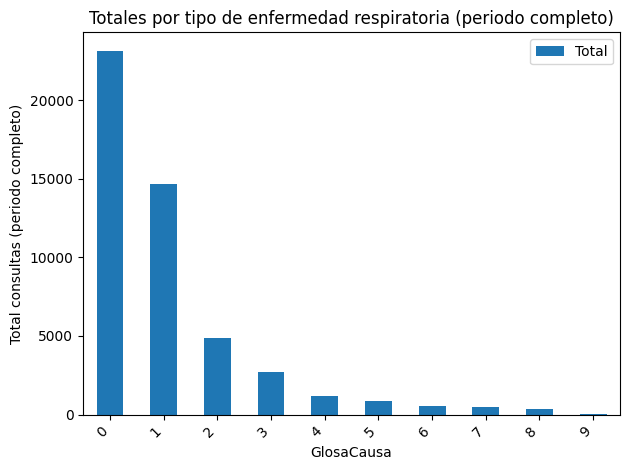

In [39]:
# Gráfico: barras (una barra por causa)
plt.figure(figsize=(12,6))
totals_by_cause.plot(kind='bar')
plt.ylabel('Total consultas (periodo completo)')
plt.xlabel('GlosaCausa')
plt.title('Totales por tipo de enfermedad respiratoria (periodo completo)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
# Totales por grupo de edad (periodo completo)
age_cols = ['Menores_1','De_1_a_4','De_5_a_14','De_15_a_64','De_65_y_mas']
totals_by_age = df[age_cols].sum().sort_values(ascending=False)
print('Totales por grupo de edad (periodo completo):')
display(totals_by_age)

Totales por grupo de edad (periodo completo):


De_15_a_64     19895
De_5_a_14      12557
De_1_a_4        7760
De_65_y_mas     6122
Menores_1       2537
dtype: int64

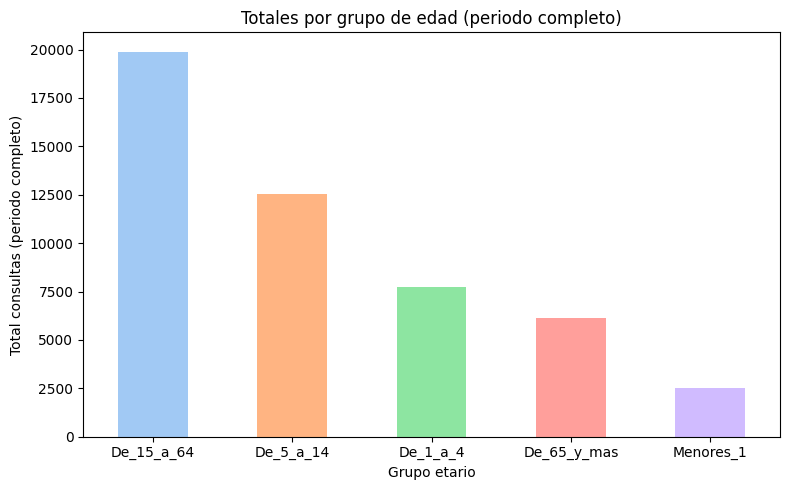

In [41]:
# Gráfico: barras por grupo de edad
plt.figure(figsize=(8,5))
totals_by_age.plot(kind='bar', color=sns.color_palette('pastel'))
plt.ylabel('Total consultas (periodo completo)')
plt.xlabel('Grupo etario')
plt.title('Totales por grupo de edad (periodo completo)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

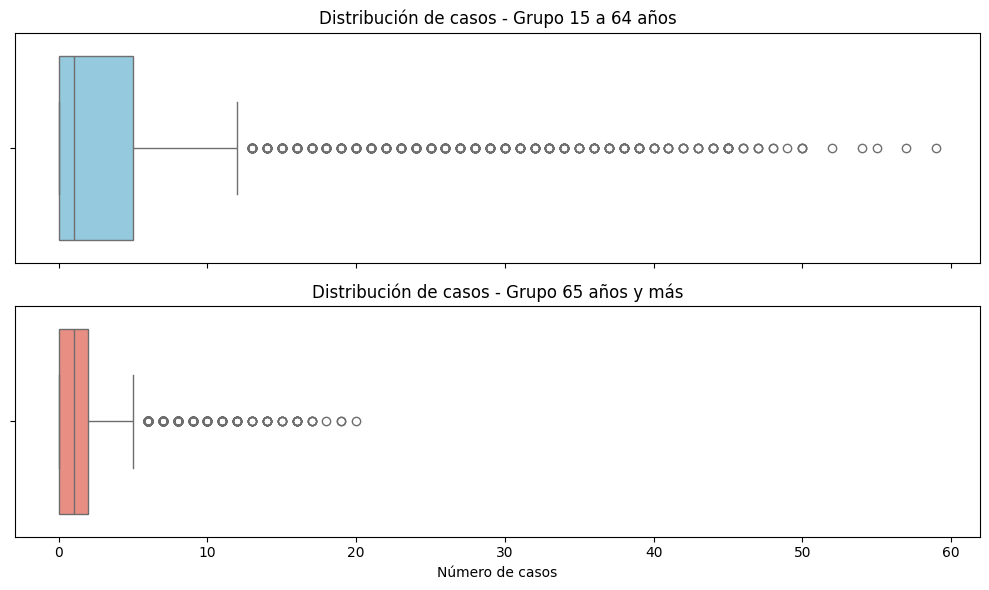

In [42]:
# Tomamos solo las columnas que queremos graficar
cols = ['De_15_a_64', 'De_65_y_mas']

# Transformamos el DataFrame a formato largo
df_long = df[cols].melt(var_name='grupo_etario', value_name='conteo')

# Creamos la figura con dos boxplots, uno por grupo etario
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
ax1, ax2 = ax

# Boxplot para 15-64 años
sns.boxplot(
    data=df_long[df_long['grupo_etario'] == 'De_15_a_64'],
    x='conteo', ax=ax1, color='skyblue'
)
ax1.set_title("Distribución de casos - Grupo 15 a 64 años")
ax1.set_xlabel("")
ax1.set_ylabel("")

# Boxplot para 65 y más
sns.boxplot(
    data=df_long[df_long['grupo_etario'] == 'De_65_y_mas'],
    x='conteo', ax=ax2, color='salmon'
)
ax2.set_title("Distribución de casos - Grupo 65 años y más")
ax2.set_xlabel("Número de casos")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()


### (*10 pts*) 2.4 EDA sobre contaminación

Analice ahora el DataFrame `sinca` haciendo lo siguiente que posee en la columna `Registros validados` el nivel de contaminación por mp2.5:
- Haga un gráfico que muestre la evolución del nivel de contaminación a lo largo del año.
- Calcule la media y la varianza del nivel de contaminación a lo largo del año.

In [43]:
sinca.head()

,FECHA (YYMMDD),HORA (HHMM),Registros validados,fecha
0,230101,0,7.0,2023-01-01
1,230102,0,5.0,2023-01-02
2,230103,0,6.0,2023-01-03
3,230104,0,5.0,2023-01-04
4,230105,0,4.0,2023-01-05


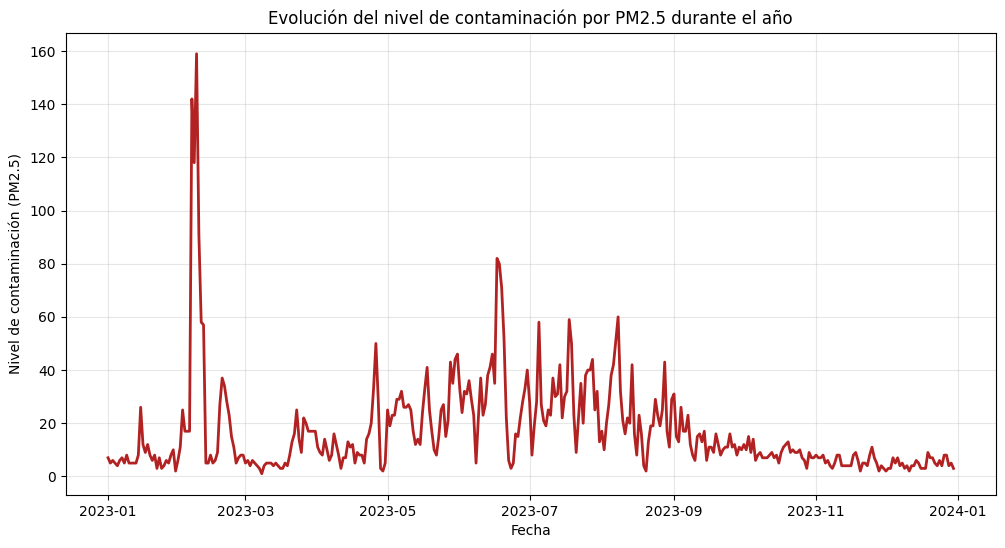

In [44]:
# --- Gráfico: evolución del nivel de contaminación ---
plt.figure(figsize=(12,6))
sns.lineplot(data=sinca, x='fecha', y='Registros validados', color='firebrick', linewidth=2)
plt.title('Evolución del nivel de contaminación por PM2.5 durante el año')
plt.xlabel('Fecha')
plt.ylabel('Nivel de contaminación (PM2.5)')
plt.grid(True, alpha=0.3)
plt.show()


In [45]:
# --- Estadísticas descriptivas ---
media = sinca['Registros validados'].mean()
varianza = sinca['Registros validados'].var()

print(f"Media anual del nivel de contaminación (PM2.5): {media:.2f}")
print(f"Varianza anual del nivel de contaminación (PM2.5): {varianza:.2f}")

Media anual del nivel de contaminación (PM2.5): 16.98
Varianza anual del nivel de contaminación (PM2.5): 328.50


### (*5 pts*) 2.5 Casos de contaminación elevada

Se considera que un nivel de contaminación por mp2.5 superior o igual a 80 ug/m³ es de importancia para la salud. Identifique la cantidad de días en los que se superó ese umbral.

In [46]:
len(sinca[sinca['Registros validados']>=80])

6

## 3. Aprendiendo relaciones

En esta pregunta usaremos herramientas de ML para ver si podemos identificar si hay alguna relación entre el nivel de contaminación y las consultas por enfermedades respiratorias.

Dado que esta es una Interrogación y no tenemos mucho tiempo, para esta sección no necesita hacer validación cruzada cuando haya que entrenar un modelo; sólo separar una única vez entre datos de prueba y entrenamiento y usar eso para contestar las preguntas.

### (*10 pts*) 3.1 Preparando los datos

Nos interesan todas las enfermedades respiratorias, sin importar el tipo, así que agrupe el DataFrame `urgenciasRespiratorias` para que este tenga todas las visitas médicas, sin importar la `GlosaCausa`.

Luego, concatene ambos DataFrames, agregando al DataFrame de `urgenciasRespiratorias`, la contaminación del día correspondiente. Para ello deberá agregar una nueva columna, llamada `mp25` que tenga el valor del DataFrame `sinca` para el día correspondiente.

Haga un scatter plot que muestre la cantidad de casos respiratorios en un eje y el nivel de contaminación en el otro. ¿Observa alguna relación?

In [47]:
causas = [3,4,6,5,2,7,11,10,30,31]
urgenciasRespiratorias = urgencias[urgencias['IdCausa'].isin(causas)]
urgenciasRespiratorias = urgenciasRespiratorias[['fecha', 'Total', 'Menores_1', 'De_1_a_4', 'De_5_a_14', 'De_15_a_64', 'De_65_y_mas']].groupby(['fecha']).sum()
urgenciasRespiratorias.reset_index(inplace=True)
urgenciasRespiratorias

,fecha,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas
0,2023-01-01,48,1,2,5,23,17
1,2023-01-02,73,8,15,7,37,6
2,2023-01-03,126,6,27,11,59,23
3,2023-01-04,87,7,4,15,47,14
4,2023-01-05,89,3,14,7,47,18
...,...,...,...,...,...,...,...
360,2023-12-27,133,5,16,22,70,20
361,2023-12-28,70,3,8,20,30,9
362,2023-12-29,82,2,10,18,36,16
363,2023-12-30,89,2,12,20,44,11


In [48]:
urgenciasRespiratorias = pd.merge(urgenciasRespiratorias, sinca[['fecha', 'Registros validados']], on="fecha")
urgenciasRespiratorias = urgenciasRespiratorias.rename(columns={"Registros validados": "mp25"})
urgenciasRespiratorias

,fecha,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,mp25
0,2023-01-01,48,1,2,5,23,17,7.0
1,2023-01-02,73,8,15,7,37,6,5.0
2,2023-01-03,126,6,27,11,59,23,6.0
3,2023-01-04,87,7,4,15,47,14,5.0
4,2023-01-05,89,3,14,7,47,18,4.0
...,...,...,...,...,...,...,...,...
359,2023-12-26,86,0,8,20,41,17,8.0
360,2023-12-27,133,5,16,22,70,20,8.0
361,2023-12-28,70,3,8,20,30,9,4.0
362,2023-12-29,82,2,10,18,36,16,5.0


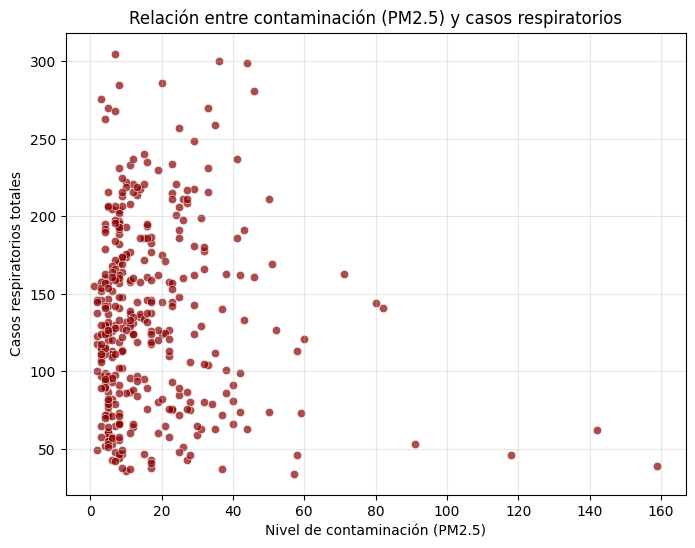

In [49]:
# === 2.5 Relación entre contaminación y casos respiratorios ===

plt.figure(figsize=(8,6))
sns.scatterplot(data=urgenciasRespiratorias, x='mp25', y='Total', alpha=0.7, color='darkred')

plt.title('Relación entre contaminación (PM2.5) y casos respiratorios')
plt.xlabel('Nivel de contaminación (PM2.5)')
plt.ylabel('Casos respiratorios totales')
plt.grid(alpha=0.3)
plt.show()

In [50]:
from scipy.stats import pearsonr

# Calcular correlación lineal (Pearson)
corr, p_val = pearsonr(urgenciasRespiratorias['mp25'], urgenciasRespiratorias['Total'])
print(f"Correlación de Pearson: {corr:.3f} (p-valor: {p_val:.4f})")

Correlación de Pearson: -0.055 (p-valor: 0.2995)


### (*4 pts*) 3.2 Relación

Calcule la correlación entre la cantidad de casos respiratorios totales y por grupo de edad, y el nivel de contaminación. ¿Qué nos dice ese número?

Además de mostrar la matriz de correlación, use un gráfico adecuado para visualizar estos valores.

In [51]:
urgenciasRespiratorias.corr(numeric_only=True)

,Total,Menores_1,De_1_a_4,De_5_a_14,De_15_a_64,De_65_y_mas,mp25
Total,1.000000,0.551370,0.826626,0.926181,0.875049,0.444018,-0.054531
Menores_1,0.551370,1.000000,0.453466,0.454414,0.408567,0.209237,0.033537
De_1_a_4,0.826626,0.453466,1.000000,0.775481,0.548997,0.235211,-0.001738
De_5_a_14,0.926181,0.454414,0.775481,1.000000,0.716468,0.237314,-0.036040
De_15_a_64,0.875049,0.408567,0.548997,0.716468,1.000000,0.398680,-0.095590
De_65_y_mas,0.444018,0.209237,0.235211,0.237314,0.398680,1.000000,-0.055703
mp25,-0.054531,0.033537,-0.001738,-0.036040,-0.095590,-0.055703,1.000000


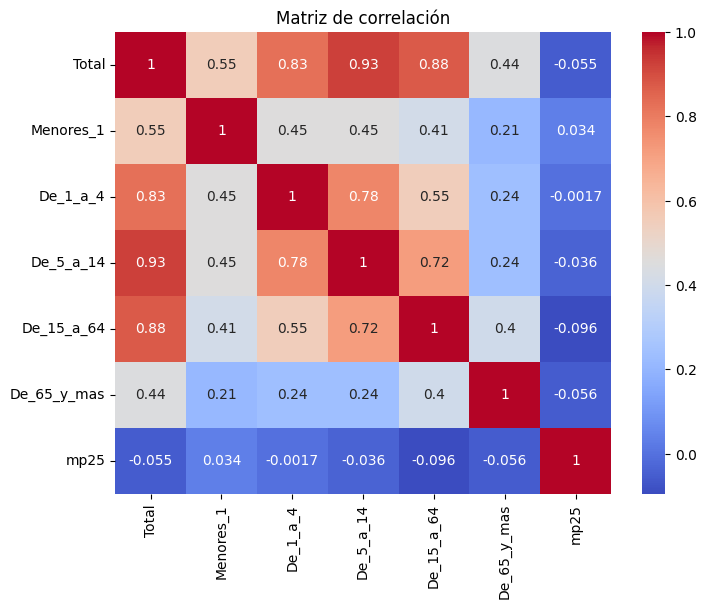

In [52]:
## Grafico de correlacion
plt.figure(figsize=(8,6))
sns.heatmap(urgenciasRespiratorias.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

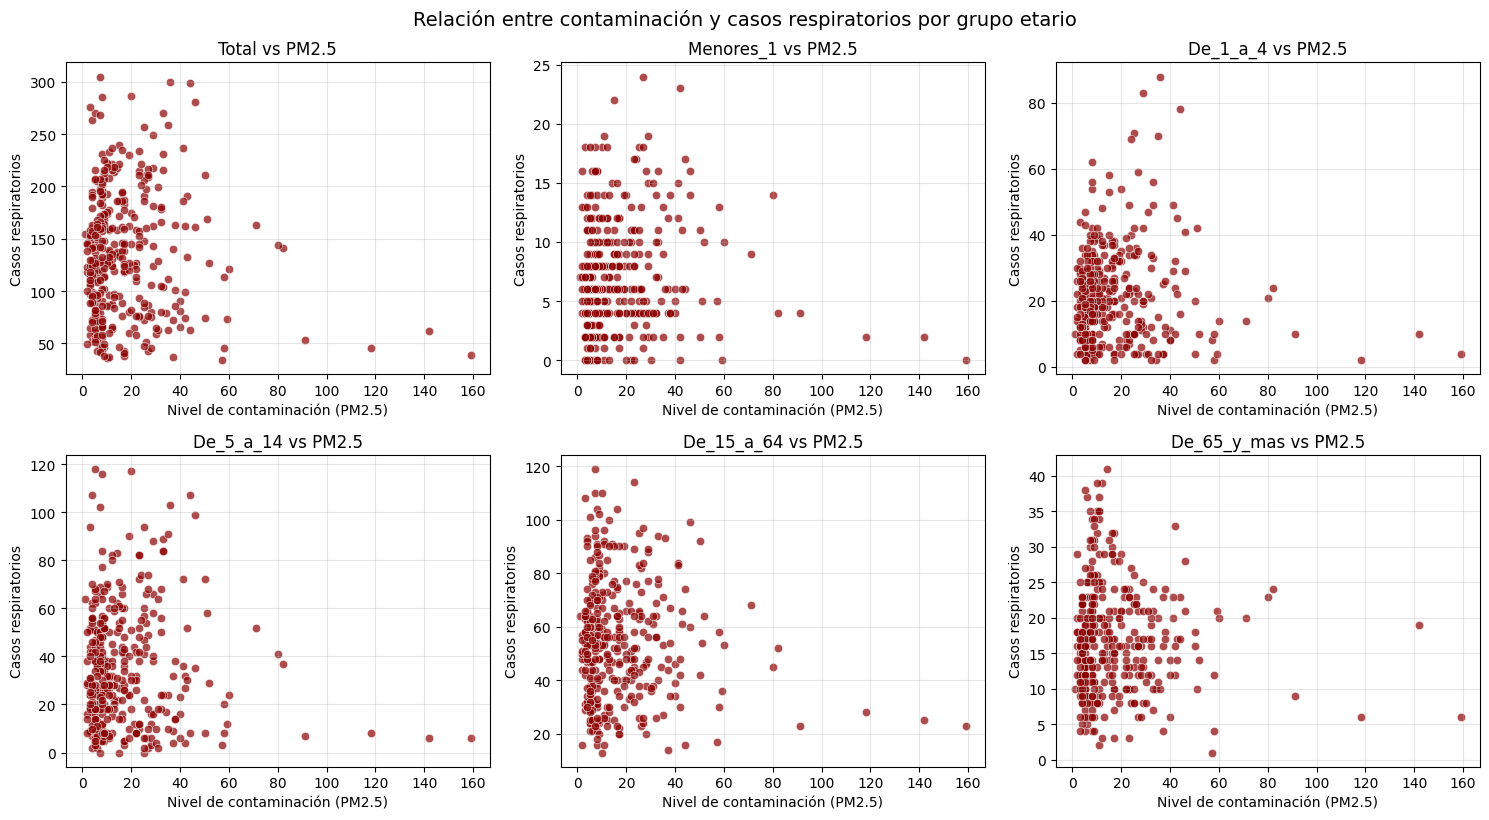

In [53]:
# === Scatterplots: casos respiratorios vs nivel de contaminación (mp25) ===

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos columnas de interés
columnas = ['Total', 'Menores_1', 'De_1_a_4', 'De_5_a_14', 'De_15_a_64', 'De_65_y_mas']

# Configuramos la figura
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

# Creamos un scatterplot por cada grupo etario
for i, col in enumerate(columnas):
    sns.scatterplot(data=urgenciasRespiratorias, x='mp25', y=col, ax=axes[i], color='darkred', alpha=0.7)
    axes[i].set_title(f'{col} vs PM2.5')
    axes[i].set_xlabel('Nivel de contaminación (PM2.5)')
    axes[i].set_ylabel('Casos respiratorios')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Relación entre contaminación y casos respiratorios por grupo etario', fontsize=14, y=1.02)
plt.show()


### (*5 pts*) 3.3 Desfase

Al parecer existe un desfase temporal entre un evento de contaminación y las consultas por enfermedades respiratorias. En general, se estima que el desfase es de 5 días, es decir que, 5 días despúes de un evento de contaminación, una persona muestra síntomas asociados a algún problema respiratorio. 

Tratemos de validar esa hipótesis.

Para ello, crearemos un nuevo DataFrame llamado `sinca_menos_5` que tendrá la fecha desfasada en 5 días. El siguiente código hace eso para usted.

In [54]:
from datetime import timedelta

sinca_menos_5 = sinca.copy(deep=True)
sinca_menos_5['fecha'] = sinca['fecha'] - timedelta(days=5)

Ahora agregue la columna `mp25_menos_5` al DataFrame `urgenciasRespiratorias`, con el valor del registro de contaminación para la fecha `t_menos_5`. Esto hará que la columna tenga el valor de la contaminación por material particulado 2.5 de 5 días antes del día de la consulta médica.

In [55]:
urgenciasRespiratorias = pd.merge(urgenciasRespiratorias, sinca_menos_5[['fecha', 'Registros validados']], on="fecha")
urgenciasRespiratorias = urgenciasRespiratorias.rename(columns={"Registros validados": "mp25_menos_5"})

### (*5 pts*) 3.4 Relación

Haga lo siguiente para analizar la relación entre el nivel de consultas médicas y el nivel de contaminación de 5 días antes:
- Calcule nuevamente la correlación entre los de urgencia respiratoria (totales y por edad) y el nivel de contaminación 5 días antes. ¿Cómo es ese nivel en comparación al calculado antes?
- Haga un scatter plot que muestre la cantidad de casos respiratorios en un eje y el nivel de contaminación de 5 días antes en el otro. ¿Observa alguna relación?
- ¿Confirma o no la hipótesis planteada?

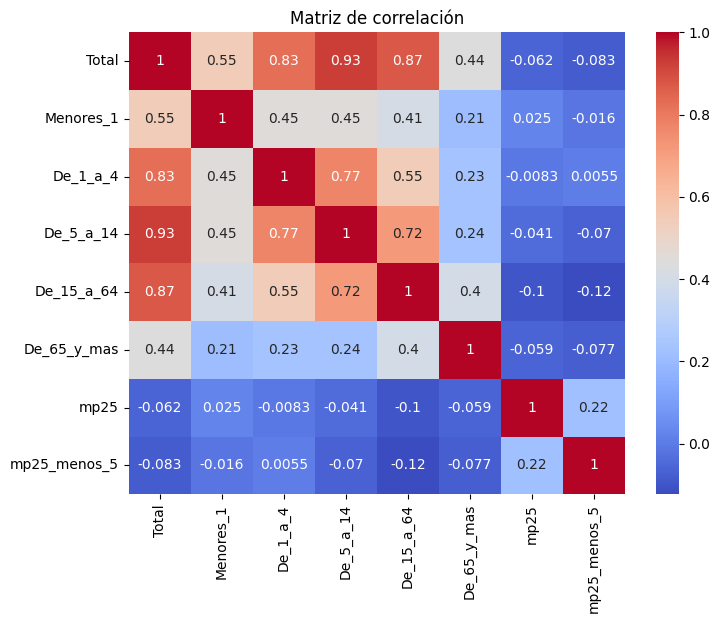

In [56]:
## Grafico de correlacion
plt.figure(figsize=(8,6))
sns.heatmap(urgenciasRespiratorias.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

**Tips**

> + Busquen hacer merge entre los dos datasets
> + Vean las correlaciones de ese nuevo df y piensen en un modelo que sea funcional

### Escalamiento

In [57]:
# === Escalamiento de Variables ===
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt

# Ejemplo de DataFrame con una columna numérica
full_df = pd.DataFrame({
    'PIB_2021': [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
})

# Escalamiento Logarítmico
full_df['logPIB_2021'] = np.log10(full_df['PIB_2021'])

# Escalamiento Min–Max (rango [0,1])
scaler_minmax = MinMaxScaler()
full_df['PIB_minmax'] = scaler_minmax.fit_transform(full_df[['PIB_2021']])

# Escalamiento Z-score (media 0, desviación estándar 1)
scaler_std = StandardScaler()
full_df['PIB_zscore'] = scaler_std.fit_transform(full_df[['PIB_2021']])

# Escalamiento Robusto (basado en mediana e IQR)
scaler_robust = RobustScaler()
full_df['PIB_robust'] = scaler_robust.fit_transform(full_df[['PIB_2021']])

# Mostrar resultados
print("=== Ejemplo de escalamientos aplicados ===")
display(full_df)


=== Ejemplo de escalamientos aplicados ===


,PIB_2021,logPIB_2021,PIB_minmax,PIB_zscore,PIB_robust
0,500,2.69897,0.000000,-0.745632,-0.301370
1,1000,3.00000,0.007874,-0.721482,-0.273973
2,2000,3.30103,0.023622,-0.673182,-0.219178
3,4000,3.60206,0.055118,-0.576582,-0.109589
4,8000,3.90309,0.118110,-0.383381,0.109589
5,16000,4.20412,0.244094,0.003019,0.547945
6,32000,4.50515,0.496063,0.775819,1.424658
7,64000,4.80618,1.000000,2.321420,3.178082


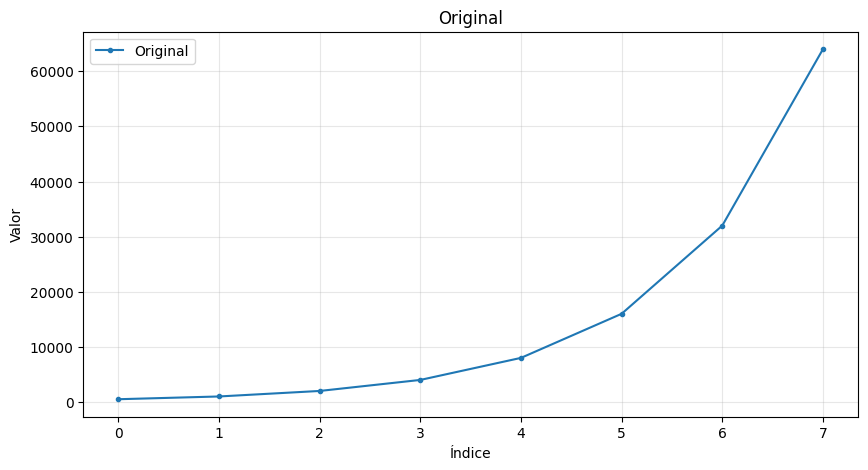

In [58]:
# --- Visualización comparativa ---
plt.figure(figsize=(10,5))
plt.plot(full_df['PIB_2021'], label='Original', marker='.')

plt.title('Original')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

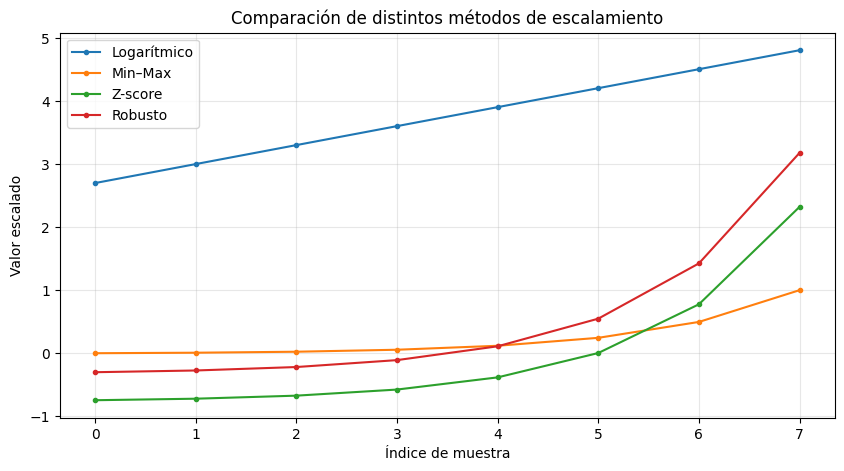

In [59]:
plt.figure(figsize=(10,5))
plt.plot(full_df['logPIB_2021'], label='Logarítmico', marker='.')
plt.plot(full_df['PIB_minmax'], label='Min–Max', marker='.')
plt.plot(full_df['PIB_zscore'], label='Z-score', marker='.')
plt.plot(full_df['PIB_robust'], label='Robusto', marker='.')
plt.title('Comparación de distintos métodos de escalamiento')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor escalado')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

| Método          | Fórmula                           | Ventajas principales                     | Cuándo usarlo                                  |
| --------------- | --------------------------------- | ---------------------------------------- | ---------------------------------------------- |
| **Logarítmico** | $x' = \log_{10}(x)$             | Reduce asimetría, estabiliza varianza    | Datos con crecimiento exponencial o sesgo alto |
| **Min–Max**     | $x' = (x - min)/(max - min)$    | Rango fijo [0,1], mantiene proporciones  | Redes neuronales, kNN                          |
| **Z-score**     | $x' = (x - \mu)/\sigma$         | Centra y escala, facilita interpretación | Regresión, SVM, PCA                            |
| **Robusto**     | $x' = (x - \text{mediana})/IQR$ | Tolerante a outliers                     | Datos con valores extremos                     |


| Tipo               | Ejemplo            | Es lineal | Cambia forma | Objetivo                   |
| ------------------ | ------------------ | --------- | ------------ | -------------------------- |
| **Escalamiento**   | Min–Max, Z-score, Robusto   | ✅      | ❌         | Poner en rango comparable  |
| **Transformación** | Log | ❌      | ✅         | Corregir sesgo, linealizar |


### (*10 pts*) 3.5 Regresión Lineal

Consideremos sólo los casos de enfermedades respiratorias de niños entre 1 y 4 años y el nivel de contaminación 5 días antes. Entrene una regresión lineal que tenga como variable independiente el nivel de contaminación 5 días antes y, como variable dependiente, la cantidad de consultas de niños entre 1 y 4 años por enfermedades respiratorias.

Calcule la Raiz Error Cuadrático Medio (rmse) y el r² para su regresión. ¿Es un buen modelo?

**Tips**
> - RMS: Idealmemte lo más cercano a 0
> - $R^2$: Idealmente lo más cercano a 1

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Seleccionamos sólo las columnas relevantes y eliminamos filas con NA
df = urgenciasRespiratorias[['De_1_a_4', 'mp25_menos_5']].dropna().copy()

X = df['mp25_menos_5'].values.reshape(-1, 1)
y = df['De_1_a_4'].values

# Separación única entrenamiento/prueba (no CV)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos la regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción y métricas
y_pred = model.predict(X_test)
rmse_ = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse_:.3f}")
print(f"R^2: {r2:.3f}")

RMSE: 14.265
R^2: -0.040


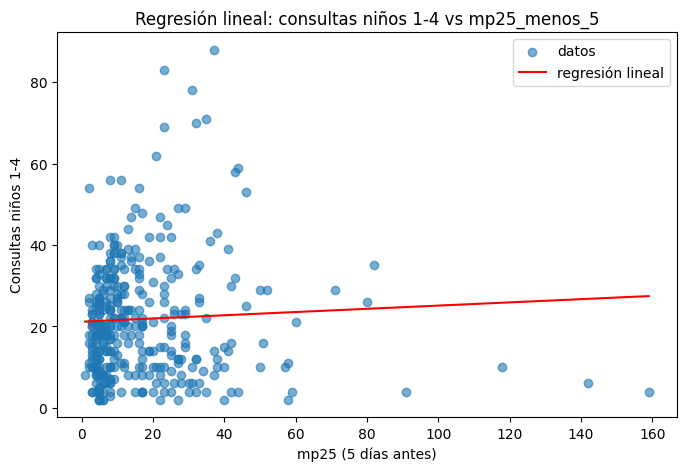

In [62]:
# Gráfico: puntos y recta ajustada
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.6, label='datos')
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', label='regresión lineal')
plt.xlabel('mp25 (5 días antes)')
plt.ylabel('Consultas niños 1-4')
plt.title('Regresión lineal: consultas niños 1-4 vs mp25_menos_5')
plt.legend()
plt.show()

### (*15 pts*) 3.6 Regresión Polinomial

Dada la aparente relación nolineal entre las variables, suena lógico probar con modelos de regresión polinomial para conectar temperatura y salinidad.

Haga una regresión de polinomial de grados 2 y 3 y muestre los dos siguientes gráficos:
- Un gráfico que muestre los datos y los 2 modelos de regresión entrenados.
- Un gráfico que muestre el RMSE de entrenamiento y de prueba con respecto al grado del polinomio del modelo de regresión.
- ¿Cuál de los modelos eligiría? Justifique su respuesta.

In [63]:
# === 3.6 REGRESIÓN POLINOMIAL ===

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

def rmse(y_true, y_pred):
    """Calcula la raíz del error cuadrático medio."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [64]:
grados = []

for i in range(2, 15):
    grados.append(i)

rmse_train_list = []
rmse_test_list = []
models = {}

for g in grados:

    poly_feats = PolynomialFeatures(degree=g, include_bias=False) # Crear características polinomiales de grado g
    X_train_poly = poly_feats.fit_transform(X_train) # Transformar conjunto de entrenamiento
    X_test_poly = poly_feats.transform(X_test) # Transformar conjunto de prueba

    model = LinearRegression().fit(X_train_poly, y_train) # Entrenar modelo
    models[g] = (poly_feats, model) # Guardar modelo y transformador

    # Predicciones
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)

    # RMSE
    rmse_train = rmse(y_train, y_pred_train)
    rmse_test = rmse(y_test, y_pred_test)

    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)

    if g <= 3:
        print(f"\n===== MODELO POLINOMIAL GRADO {g} =====")

        print('\n=== Conjunto de entrenamiento ===')
        print('R2 (train)', r2_score(y_train, y_pred_train))
        print('RMSE (train)', rmse_train)

        print('\n=== Conjunto de prueba ===')
        print('R2 (test)', r2_score(y_test, y_pred_test))
        print('RMSE (test)', rmse_test)



===== MODELO POLINOMIAL GRADO 2 =====

=== Conjunto de entrenamiento ===
R2 (train) 0.03626537285279807
RMSE (train) 14.232702260526711

=== Conjunto de prueba ===
R2 (test) -0.05918881083504757
RMSE (test) 14.393355004340549

===== MODELO POLINOMIAL GRADO 3 =====

=== Conjunto de entrenamiento ===
R2 (train) 0.04663573115221986
RMSE (train) 14.155918968835625

=== Conjunto de prueba ===
R2 (test) -0.0616964708767318
RMSE (test) 14.41038327300652


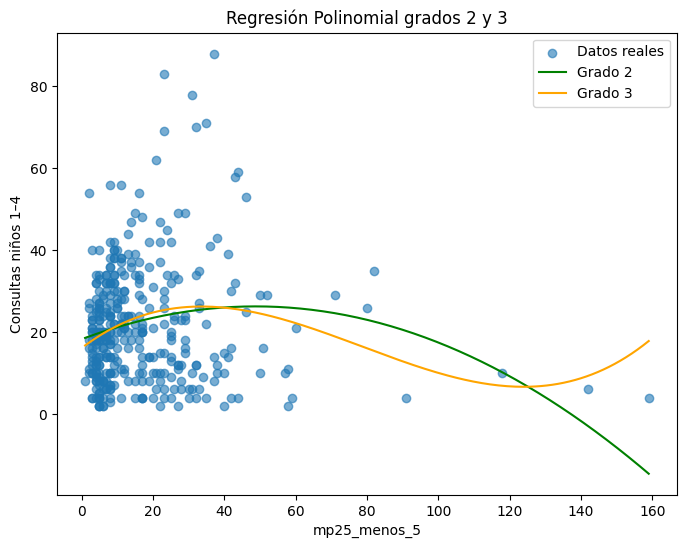

In [65]:
# === GRÁFICO 1: Datos + modelos polinomiales grado 2 y 3 ===
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.6, label='Datos reales')

x_line = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
for g, color in zip([2,3], ['green','orange']): # zip para iterar sobre grados y colores
    poly, model = models[g]
    y_line = model.predict(poly.transform(x_line))
    plt.plot(x_line, y_line, color=color, label=f'Grado {g}')

plt.xlabel('mp25_menos_5')
plt.ylabel('Consultas niños 1–4')
plt.title('Regresión Polinomial grados 2 y 3')
plt.legend()
plt.show()

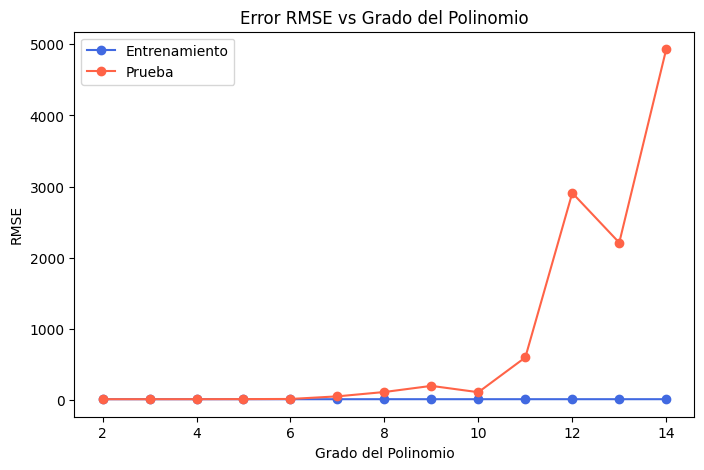

In [66]:
# === GRÁFICO 2: RMSE de entrenamiento y prueba según grado ===
plt.figure(figsize=(8,5))
plt.plot(grados, rmse_train_list, marker='o', label='Entrenamiento', color='royalblue')
plt.plot(grados, rmse_test_list, marker='o', label='Prueba', color='tomato')
plt.xlabel('Grado del Polinomio')
plt.ylabel('RMSE')
plt.title('Error RMSE vs Grado del Polinomio')
plt.legend()
plt.show()

**Tips Finales**

> - Explora los datasets con antelación
> - Crea un notebook solo o en grupo haciendo EDA y todo lo demás visto en la ayudantía
> - Justifica siempre tus decisiones
> - Gestiona bien tus tiempos
> - Prioricen responder más preguntas

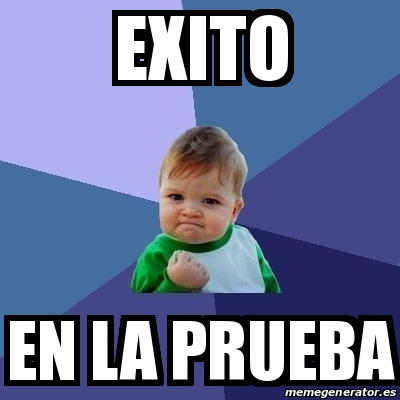 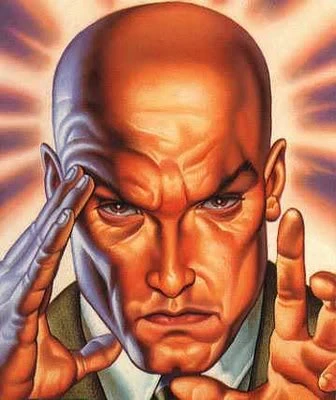